In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 99

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

# Modeling Home Data for Liverpool

In [2]:
# Reading in stored dataset for liverpool statistics

df_home = pd.read_csv(r'C:\Users\Dask\Documents\Code\dsi\capstone\capstone\Data\stats_data\combined_liverpool_stats_home.csv')

In [3]:
df_home

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeWin
0,2005-08-20,Liverpool,Sunderland,1.0,0.0,H,1.0,0.0,H,B Knight,15.0,2.0,6.0,0.0,8.0,20.0,5.0,5.0,2.0,3.0,0.0,1.0,1
1,2005-09-18,Liverpool,Man United,0.0,0.0,D,0.0,0.0,D,R Styles,9.0,4.0,3.0,1.0,24.0,15.0,4.0,2.0,2.0,2.0,0.0,0.0,1
2,2005-02-10,Liverpool,Chelsea,1.0,4.0,A,1.0,2.0,A,G Poll,11.0,7.0,5.0,5.0,15.0,17.0,4.0,2.0,1.0,3.0,0.0,0.0,0
3,2005-10-15,Liverpool,Blackburn,1.0,0.0,H,0.0,0.0,D,M Halsey,19.0,4.0,5.0,1.0,8.0,22.0,9.0,2.0,0.0,3.0,0.0,1.0,1
4,2005-10-29,Liverpool,West Ham,2.0,0.0,H,1.0,0.0,H,U Rennie,17.0,4.0,9.0,2.0,15.0,13.0,10.0,5.0,2.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2021-11-12,Liverpool,Aston Villa,1.0,0.0,H,0.0,0.0,D,S Attwell,20.0,4.0,5.0,0.0,13.0,6.0,11.0,3.0,1.0,2.0,0.0,0.0,1
312,2021-12-16,Liverpool,Newcastle,3.0,1.0,H,2.0,1.0,H,M Dean,23.0,4.0,8.0,2.0,9.0,4.0,11.0,0.0,1.0,3.0,0.0,0.0,1
313,2022-01-16,Liverpool,Brentford,3.0,0.0,H,1.0,0.0,H,J Moss,27.0,6.0,13.0,1.0,6.0,6.0,9.0,0.0,0.0,1.0,0.0,0.0,1
314,2022-10-02,Liverpool,Leicester,2.0,0.0,H,1.0,0.0,H,C Kavanagh,22.0,5.0,11.0,1.0,11.0,7.0,7.0,6.0,1.0,0.0,0.0,0.0,1


In [4]:
# Baseline accuracy score

df_home['HomeWin'].value_counts(normalize = True)

1    0.892405
0    0.107595
Name: HomeWin, dtype: float64

In [5]:
#Mapping full time and half time results to show wins and draws combined to be undefeated as 2, and losses as 1

df_home['FTR'] = df_home['FTR'].map({'H': 2, 'D': 2, 'A': 1})
df_home['HTR'] = df_home['HTR'].map({'H': 2, 'D': 2, 'A': 1})

In [6]:
df_home.dtypes

Date         object
HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR           int64
HTHG        float64
HTAG        float64
HTR           int64
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HC          float64
AC          float64
HY          float64
AY          float64
HR          float64
AR          float64
HomeWin       int64
dtype: object

In [7]:
# Converting all columns to integers

df_home['FTAG'] = df_home['FTAG'].astype(int)
df_home['FTHG'] = df_home['FTHG'].astype(int)
df_home['HTHG'] = df_home['HTHG'].astype(int)
df_home['HTAG'] = df_home['HTAG'].astype(int)
df_home['HS'] = df_home['HS'].astype(int)
df_home['AS'] = df_home['AS'].astype(int)
df_home['HST'] = df_home['HST'].astype(int)
df_home['AST'] = df_home['AST'].astype(int)
df_home['HF'] = df_home['HF'].astype(int)
df_home['AF'] = df_home['AF'].astype(int)
df_home['HC'] = df_home['HC'].astype(int)
df_home['AC'] = df_home['AC'].astype(int)
df_home['HY'] = df_home['HY'].astype(int)
df_home['AY'] = df_home['AY'].astype(int)
df_home['HR'] = df_home['HR'].astype(int)
df_home['AR'] = df_home['AR'].astype(int)

In [8]:
# Checking for null values, there are none since it's well recorded sports data

df_home.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
HomeWin     0
dtype: int64

In [9]:
# Turning the referee and away team string columns into dummy columns

df_home = pd.concat([df_home, pd.get_dummies(df_home['Referee'])], axis=1)
df_home = pd.concat([df_home, pd.get_dummies(df_home['AwayTeam'])], axis=1)

In [10]:
# setting up X and y variable columns for modeling and scaling them

X = df_home.drop(columns = ['HomeWin', 'HomeTeam', 'AwayTeam', 'Referee', 'Date', 'FTHG', 'FTR'])
y = df_home['HomeWin']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

#### Logistic Regression for home data

In [11]:
#Logistic Regression Model

logreg = LogisticRegression(C=.01)
logreg.fit(X_train_sc, y_train)
logreg.score(X_train_sc, y_train), logreg.score(X_test_sc, y_test)

(0.8945147679324894, 0.8860759493670886)

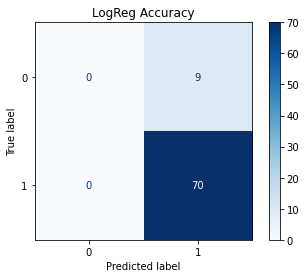

In [12]:
# Logistic regression confusion matrix

test_preds_lr = logreg.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_lr))

plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d')
plt.title('LogReg Accuracy');

plt.savefig(r'C:\Users\Dask\Documents\Code\dsi\capstone\capstone\Figures\Logreg_matrix.jpg')

In [13]:
print(classification_report(y_test, test_preds_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.89      1.00      0.94        70

    accuracy                           0.89        79
   macro avg       0.44      0.50      0.47        79
weighted avg       0.79      0.89      0.83        79



C:\Users\Dask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
recall_score(y_test, test_preds_lr)

1.0

#### KNN Classification for home data

In [15]:
# K-Nearest neighbors model

knc = KNeighborsClassifier(n_neighbors=15)
knc.fit(X_train_sc, y_train)
knc.score(X_train_sc, y_train), knc.score(X_test_sc, y_test)

(0.8945147679324894, 0.8860759493670886)

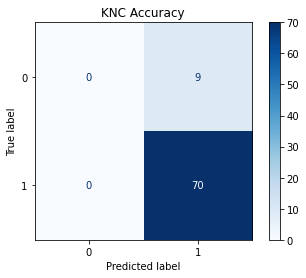

In [16]:
# KNN confusion matrix

test_preds_knc = knc.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_knc))

plot_confusion_matrix(knc, X_test, y_test, cmap='Blues', values_format='d')
plt.title('KNC Accuracy');

In [17]:
print(classification_report(y_test, test_preds_knc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.89      1.00      0.94        70

    accuracy                           0.89        79
   macro avg       0.44      0.50      0.47        79
weighted avg       0.79      0.89      0.83        79



C:\Users\Dask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dask\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
recall_score(y_test, test_preds_knc)

1.0

#### Decision Tree Classification for home data

In [19]:
# Decision Tree model

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_sc, y_train)
dtc.score(X_train_sc, y_train), dtc.score(X_test_sc, y_test)

(0.9873417721518988, 0.8607594936708861)

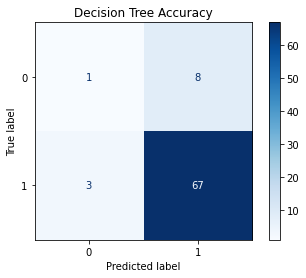

In [20]:
# Decision tree confusion matrix

test_preds_dtc = dtc.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_dtc))

plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Decision Tree Accuracy');

In [21]:
print(classification_report(y_test, test_preds_dtc))

              precision    recall  f1-score   support

           0       0.33      0.22      0.27         9
           1       0.90      0.94      0.92        70

    accuracy                           0.86        79
   macro avg       0.62      0.58      0.59        79
weighted avg       0.84      0.86      0.85        79



In [22]:
recall_score(y_test, test_preds_dtc)

0.9428571428571428

#### Bagging Classification for home data

In [23]:
# Bagging Model

bc = BaggingClassifier(n_estimators=2, random_state = 20)
bc.fit(X_train_sc, y_train)
bc.score(X_train_sc, y_train), bc.score(X_test_sc, y_test)

(0.9704641350210971, 0.8607594936708861)

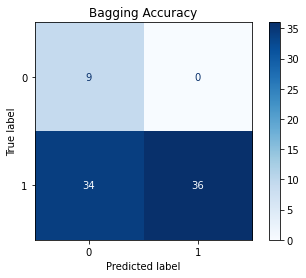

In [24]:
# Bagging model confusion matrix

test_preds_bc = bc.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_bc))

plot_confusion_matrix(bc, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Bagging Accuracy');

In [25]:
print(classification_report(y_test, test_preds_bc))

              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.94      0.90      0.92        70

    accuracy                           0.86        79
   macro avg       0.68      0.73      0.70        79
weighted avg       0.88      0.86      0.87        79



In [26]:
recall_score(y_test, test_preds_bc)

0.9

#### Random Forest Classification for home data

In [27]:
# Random Forest model

rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)
rfc.fit(X_train_sc, y_train)
rfc.score(X_train_sc, y_train), rfc.score(X_test_sc, y_test)

(0.9957805907172996, 0.8987341772151899)

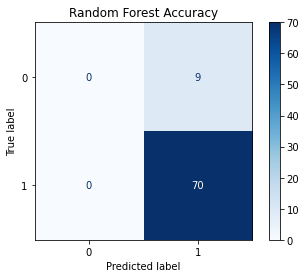

In [28]:
# Random forest confusion matrix

test_preds_rfc = rfc.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_rfc))

plot_confusion_matrix(rfc, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Random Forest Accuracy');

In [29]:
print(classification_report(y_test, test_preds_rfc))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.91      0.99      0.95        70

    accuracy                           0.90        79
   macro avg       0.79      0.60      0.64        79
weighted avg       0.88      0.90      0.88        79



In [30]:
recall_score(y_test, test_preds_rfc)

0.9857142857142858

#### ADA boost Classification for home data

In [31]:
# Ada boost model

abc = AdaBoostClassifier(n_estimators = 5)
abc.fit(X_train_sc, y_train)
abc.score(X_train_sc, y_train), abc.score(X_test_sc, y_test)

(0.9240506329113924, 0.8860759493670886)

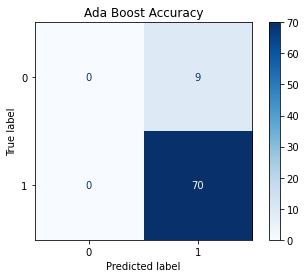

In [32]:
# Ada boost confusion matrix

test_preds_abc = abc.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_abc))

plot_confusion_matrix(abc, X_test, y_test, cmap='Blues', values_format='d')
plt.title('Ada Boost Accuracy');

In [33]:
print(classification_report(y_test, test_preds_abc))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.90      0.99      0.94        70

    accuracy                           0.89        79
   macro avg       0.70      0.55      0.56        79
weighted avg       0.85      0.89      0.85        79



In [34]:
recall_score(y_test, test_preds_abc)

0.9857142857142858

#### SVC Classification for home data

In [35]:
# Support vector model

svc = SVC()
svc.fit(X_train_sc, y_train)
svc.score(X_train_sc, y_train), svc.score(X_test_sc, y_test)

(0.9535864978902954, 0.8734177215189873)

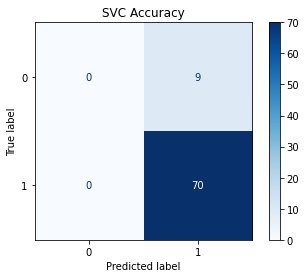

In [36]:
# Support vector confusion matrix

test_preds_svc = svc.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_svc))

plot_confusion_matrix(svc, X_test, y_test, cmap='Blues', values_format='d')
plt.title('SVC Accuracy');

In [37]:
print(classification_report(y_test, test_preds_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.88      0.99      0.93        70

    accuracy                           0.87        79
   macro avg       0.44      0.49      0.47        79
weighted avg       0.78      0.87      0.83        79



In [38]:
recall_score(y_test, test_preds_svc)

0.9857142857142858

# Modeling Away Data for Liverpool

In [39]:
# Reading in stored data and Modeling Away data for liverpool stats

df_away = pd.read_csv(r'C:\Users\Dask\Documents\Code\dsi\capstone\capstone\Data\stats_data\combined_liverpool_stats_away.csv')

In [40]:
# Baseline accuracy

df_away['AwayWin'].value_counts(normalize = True)

1    0.716088
0    0.283912
Name: AwayWin, dtype: float64

In [41]:
# Same columns mapped as home stats data

df_away['FTR'] = df_away['FTR'].map({'H': 2, 'D': 2, 'A': 1})
df_away['HTR'] = df_away['HTR'].map({'H': 2, 'D': 2, 'A': 1})

In [42]:
# Dtypes converted to integers

df_away['FTAG'] = df_away['FTAG'].astype(int)
df_away['FTHG'] = df_away['FTHG'].astype(int)
df_away['HTHG'] = df_away['HTHG'].astype(int)
df_away['HTAG'] = df_away['HTAG'].astype(int)
df_away['HS'] = df_away['HS'].astype(int)
df_away['AS'] = df_away['AS'].astype(int)
df_away['HST'] = df_away['HST'].astype(int)
df_away['AST'] = df_away['AST'].astype(int)
df_away['HF'] = df_away['HF'].astype(int)
df_away['AF'] = df_away['AF'].astype(int)
df_away['HC'] = df_away['HC'].astype(int)
df_away['AC'] = df_away['AC'].astype(int)
df_away['HY'] = df_away['HY'].astype(int)
df_away['AY'] = df_away['AY'].astype(int)
df_away['HR'] = df_away['HR'].astype(int)
df_away['AR'] = df_away['AR'].astype(int)

In [43]:
# Checking for lack of null values again

df_away.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
AwayWin     0
dtype: int64

In [44]:
# Referee and Hometeam columns dummied

df_away = pd.concat([df_away, pd.get_dummies(df_away['Referee'])], axis=1)
df_away = pd.concat([df_away, pd.get_dummies(df_away['HomeTeam'])], axis=1)

In [45]:
# Setting up X and y data for away team stats

X = df_away.drop(columns = ['AwayWin', 'HomeTeam', 'AwayTeam', 'Referee', 'Date', 'FTHG', 'FTAG', 'FTR'])
y = df_away['AwayWin']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [46]:
#Logistic Regression Model

logreg = LogisticRegression(C=.001)
logreg.fit(X_train_sc, y_train)
logreg.score(X_train_sc, y_train), logreg.score(X_test_sc, y_test)

(0.7172995780590717, 0.7125)

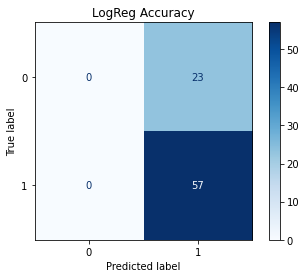

In [47]:
# Logistic regression confusion matrix

test_preds_lr = logreg.predict(X_test_sc)

pd.DataFrame(confusion_matrix(y_test, test_preds_lr))

plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d')
plt.title('LogReg Accuracy');

#plt.savefig('NB_accuracy_matrix.jpg')